# **PIMA Indians Diabetes Database**
Version 3.0
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1DQT4VYxYkkvBYuCRxkaoQ6-sWEwemYbM?usp=sharing)
---

**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes:
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

**Acknowledgements**

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**Inspiration**

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# Machine Learning Pipeline



1. Data Understanding
   
    1.1 Import Libraries

    1.2 Data Exploration

    1.3 Generate Profile Report

2. Data Preparation

    2.1 Exploratory Data Analysis

    2.2 Analyze Value of Zero

    2.3 Remove Outliers

3. Modeling

    3.1 Define Features and Target

    3.2 Compare Models' Performance
      * Random Forest Classifier
      * AdaBoost Classifier
      * Gradient Boosting Classifier
      * XGBoost Classifier
      * Support Vector Classifier with Linear Kernel
      * Multi-layer Perceptron Classifier
      * Decision Tree Classifier
      * TPOT Classifier

  3.3 Hyperparameter Tuning Using Optuna 

4. Evaluation
    
    4.1 Create Model Using Best Parameter

    4.2 Draw AUC-ROC Curve

# 1. Data Understanding

## 1.1 Import Libraries

In [ ]:
!pip install pandas==0.25
!pip install pandas-profiling==2.8.0
!pip install dask distributed --upgrade
!pip install tpot 
!pip install optuna

  Using cached https://files.pythonhosted.org/packages/3b/42/dc1f4820b95fbdbc9352ec9ad0f0c40db2122e1f2440ea53c7f9fbccf2b8/pandas-0.25.0-cp37-cp37m-manylinux1_x86_64.whl
ERROR: xarray 0.18.2 has requirement pandas>=1.0, but you'll have pandas 0.25.0 which is incompatible.
ERROR: visions 0.4.4 has requirement pandas>=0.25.3, but you'll have pandas 0.25.0 which is incompatible.
ERROR: phik 0.11.2 has requirement pandas>=0.25.1, but you'll have pandas 0.25.0 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
ERROR: pandas-profiling 2.8.0 has requirement pandas!=1.0.0,!=1.0.1,!=1.0.2,>=0.25.3, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas

  Using cached https://files.pythonhosted.org/packages/51/51/48f3fc47c4e2144da2806dfb6629c4dd1fa3d5a143f9652b141e979a8ca9/pandas-1.2.4-cp37-cp37m-manylinux1_x86_64.whl
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
  Found existing installation: pandas 0.25.0
    Uninstalling pandas-0.25.0:
      Successfully uninstalled pandas-0.25.0


  Using cached https://files.pythonhosted.org/packages/31/a2/59bd5d72cfe1ecc540d1307fc4cca8ac5151d625e0a68474e21cf7b2267d/dask-2021.6.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/91/57/4ab1e5b6a4aee968ab7a808ca99fd85a4709c2e2b32bf6956cfd5e6c6c82/distributed-2021.6.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8e/d2/d05466997f7751a2c06a7a416b7d1f131d765f7916698d3fdcb3a4d037e5/fsspec-2021.6.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/94/360258a68b55f47859d72b2d0b2b3cfe0ca4fbbcb81b78812bd00ae86b7c/partd-1.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/50/b8/e789e45b9b9c2db75e9d9e6ceb022c8d1d7e49b2c085ce8c05600f90a96b/locket-0.2.1-py2.py3-none-any.whl
ERROR: distributed 2021.6.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled 

In [ ]:
# Dataframe
import pandas as pd

# Numeric calculation
import numpy as np
import statistics as st
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# Profiling
from pandas_profiling import ProfileReport

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# XGboost
from xgboost import XGBClassifier

# Optuna
import optuna

# TPOT
from tpot import TPOTClassifier

## 1.2 Data Exploration

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/ml-projects/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## 1.3 Generate Profile Report

In [ ]:
profile = ProfileReport(df, explorative=True)

In [ ]:
profile

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 2. Data Preparation

## 2.1 Exploratory Data Analysis

In [ ]:
def analyze(column):
  data = {}
  data['Column'] = column.name
  data['Mean'] = st.mean(column)
  data['Mode'] = Counter(column).most_common()[0][0]
  data['Median'] = st.median(column)
  data['Variance'] = st.variance(column)
  data['Standard Deviation'] = st.stdev(column)
  data['Skew'] = column.skew()
  return pd.DataFrame([data])

def dataframe_analysis():
  result = pd.DataFrame()

  for col in df.columns:
    analysis = analyze(df[col])
    result = result.append(analysis)

  return result.reset_index(drop=True)

def plot_distribution(column):
  f, (ax_box, ax_hist) = plt.subplots(nrows=2, 
                                      sharex=True, 
                                      figsize=(8, 5),
                                      gridspec_kw={"height_ratios": {0.2, 1}})
  
  info = analyze(column)
  mean = info['Mean'].values[0]
  median = info['Median'].values[0]
  mode = info['Mode'].values[0]

  sns.boxplot(x=column, ax=ax_box)
  ax_box.axvline(mean, color='r', linestyle='--')
  ax_box.axvline(median, color='g', linestyle=':')
  ax_box.axvline(mode, color='b', linestyle='-')
  ax_box.set(xlabel='')

  sns.histplot(x=column, ax=ax_hist, kde=True)
  ax_hist.axvline(mean, color='r', linestyle='--')
  ax_hist.axvline(median, color='g', linestyle=':')
  ax_hist.axvline(mode, color='b', linestyle='-')

  plt.legend({'Mean':mean, 'Median':median, 'Mode':mode})
  plt.show()

In [ ]:
sns.pairplot(df, hue="Outcome", palette="husl")

In [ ]:
dataframe_analysis()

,Column,Mean,Mode,Median,Variance,Standard Deviation,Skew
0,Pregnancies,3.845052,1.000,3.0000,11.354056,3.369578,0.901674
1,Glucose,120.894531,100.000,117.0000,1022.248314,31.972618,0.173754
2,BloodPressure,69.105469,70.000,72.0000,374.647271,19.355807,-1.843608
3,SkinThickness,20.536458,0.000,23.0000,254.473245,15.952218,0.109372
4,Insulin,79.799479,0.000,30.5000,13281.180078,115.244002,2.272251
5,BMI,31.992578,32.000,32.0000,62.159984,7.884160,-0.428982
6,DiabetesPedigreeFunction,0.471876,0.254,0.3725,0.109779,0.331329,1.919911
7,Age,33.240885,22.000,29.0000,138.303046,11.760232,1.129597
8,Outcome,0.348958,0.000,0.0000,0.227483,0.476951,0.635017


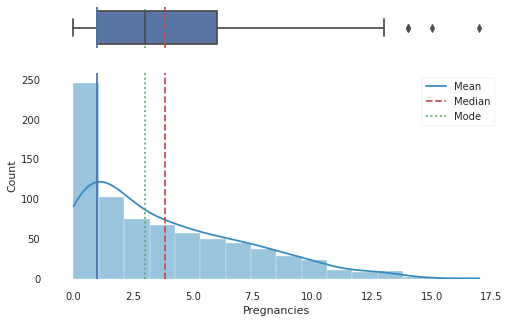

In [ ]:
plot_distribution(df['Pregnancies'])

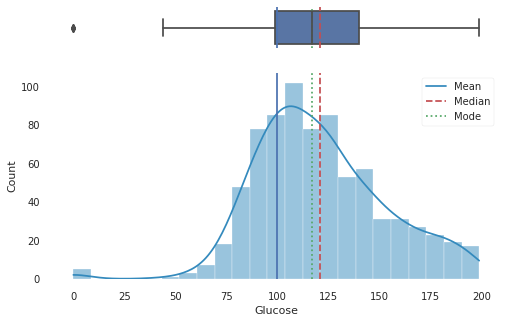

In [ ]:
plot_distribution(df['Glucose'])

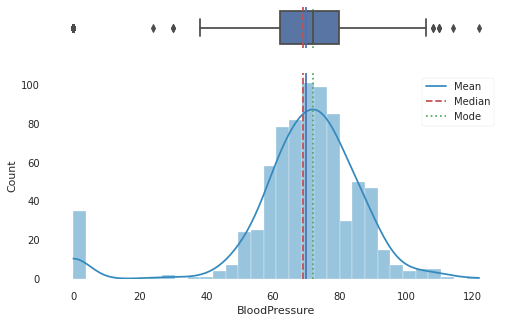

In [ ]:
plot_distribution(df['BloodPressure'])

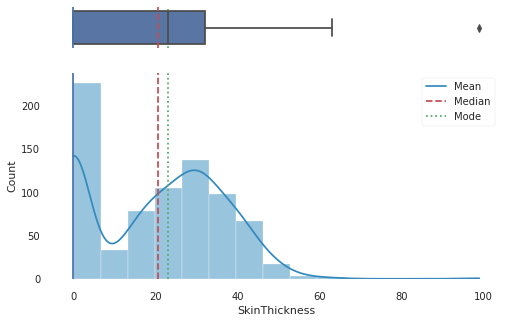

In [ ]:
plot_distribution(df['SkinThickness'])

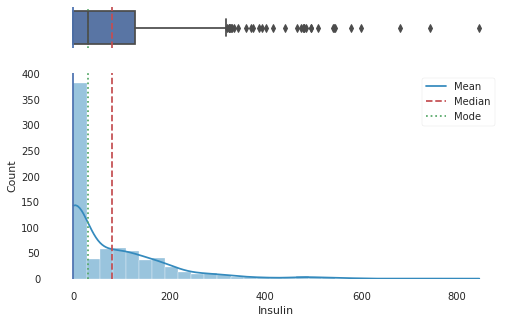

In [ ]:
plot_distribution(df['Insulin'])

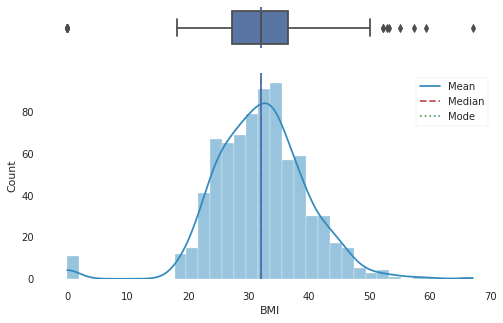

In [ ]:
plot_distribution(df['BMI'])

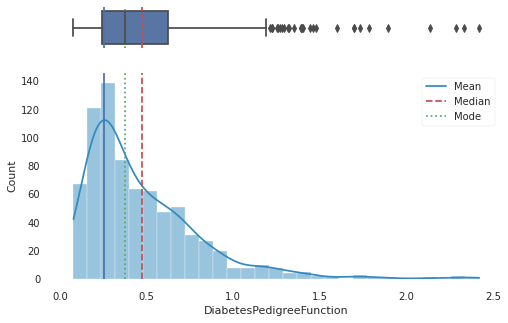

In [ ]:
plot_distribution(df['DiabetesPedigreeFunction'])

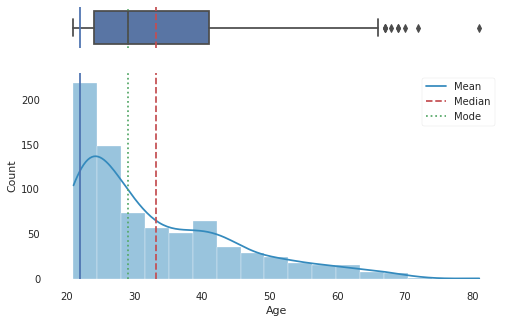

In [ ]:
plot_distribution(df['Age'])

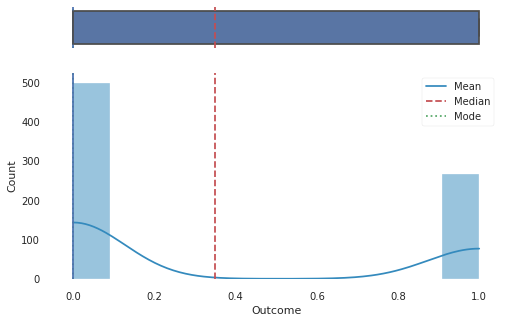

In [ ]:
plot_distribution(df['Outcome'])

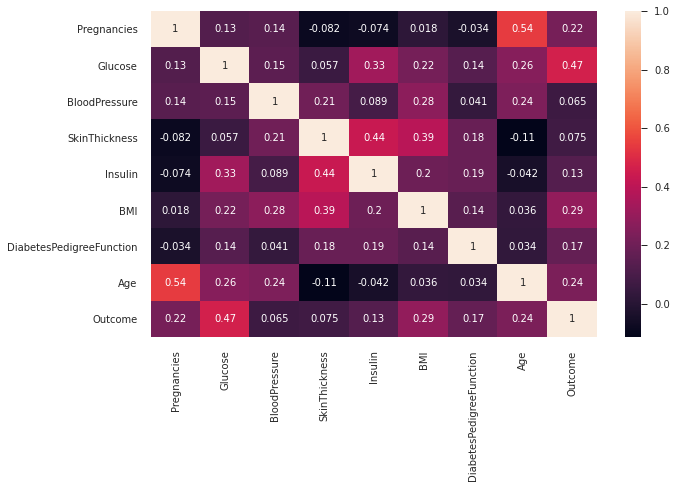

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

## 2.2 Analyze Value of Zero
For some columns, a value of zero doesn't make sense and it indicates that the value is missing.

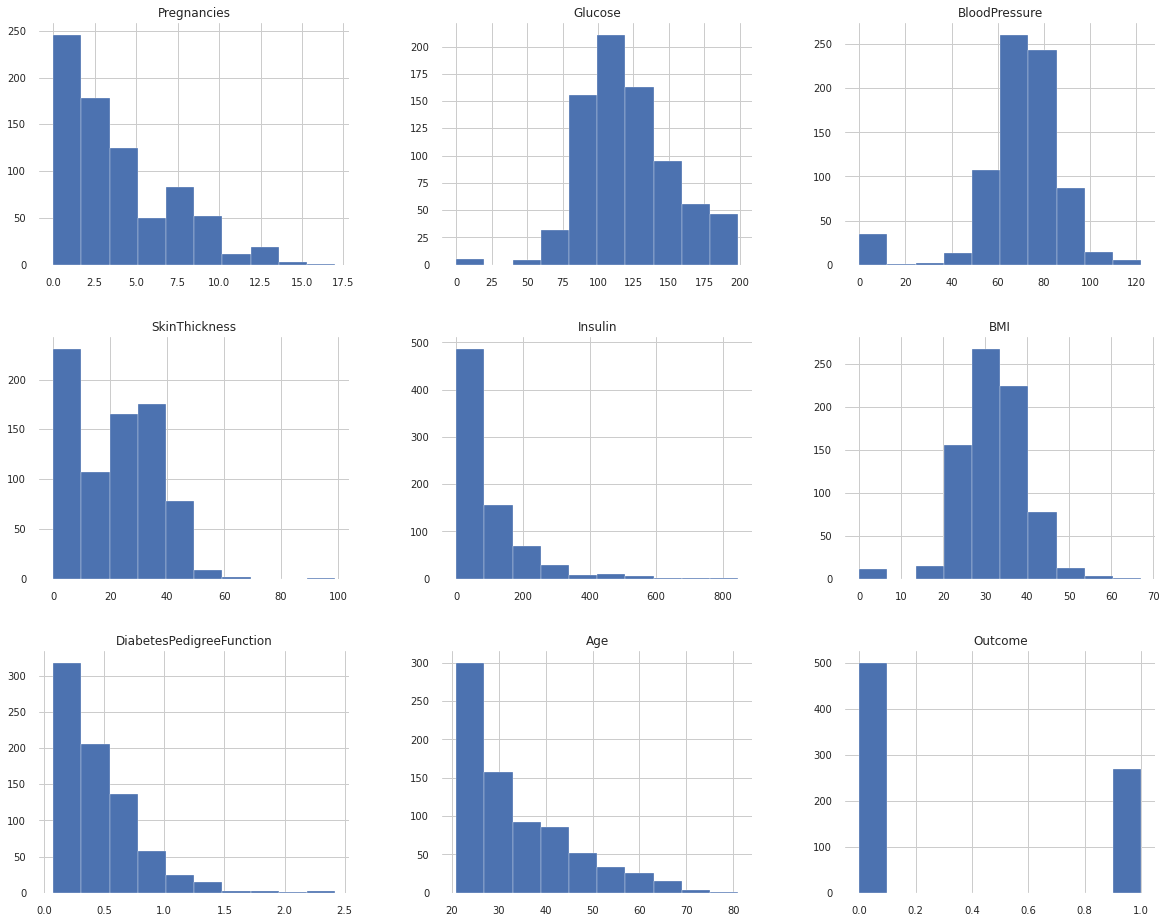

In [ ]:
_ = df.hist(figsize=(20, 16))

In [ ]:
feats_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[feats_zero] = df[feats_zero].replace(0, np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=42)
df_trans = pd.DataFrame(imp.fit_transform(df))
df_trans.columns = df.columns
df_trans.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.000000,218.903553,33.600000,0.627,50.0,1.0
1,1.0,85.0,66.000000,29.000000,70.314661,26.600000,0.351,31.0,0.0
2,8.0,183.0,64.000000,21.542781,268.507178,23.300000,0.672,32.0,1.0
3,1.0,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0.0
4,0.0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1.0
5,5.0,116.0,74.000000,22.078010,125.695623,25.600000,0.201,30.0,0.0
6,3.0,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1.0
7,10.0,115.0,72.971094,31.565415,136.287418,35.300000,0.134,29.0,0.0
8,2.0,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1.0
9,8.0,125.0,96.000000,34.062564,161.554785,35.832462,0.232,54.0,1.0


In [ ]:
_ = df_trans.hist(figsize=(20, 16))

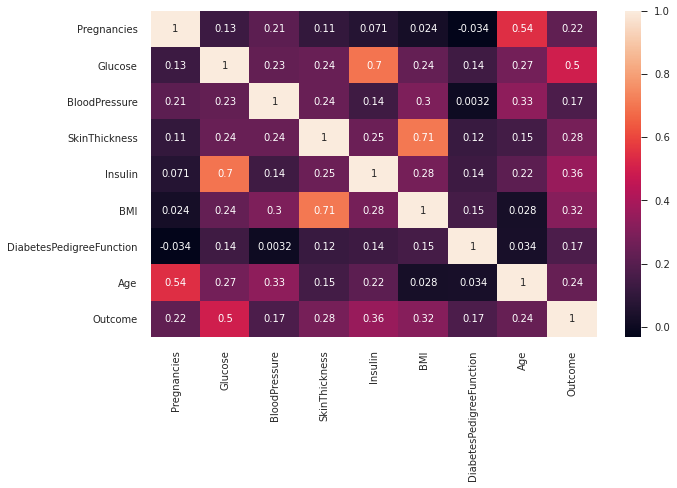

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_trans.corr(), annot=True)
plt.show()

## 2.3 Remove Outliers


In [ ]:
Q1 = df_trans.quantile(0.25)
Q3 = df_trans.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.000000
Glucose                      42.000000
BloodPressure                16.000000
SkinThickness                12.891166
Insulin                     100.004375
BMI                           9.100000
DiabetesPedigreeFunction      0.382500
Age                          17.000000
Outcome                       1.000000
dtype: float64


In [ ]:
df_cleaned = df_trans[~((df_trans < (Q1 - 1.5 * IQR)) |(df_trans > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleaned.shape

(682, 9)

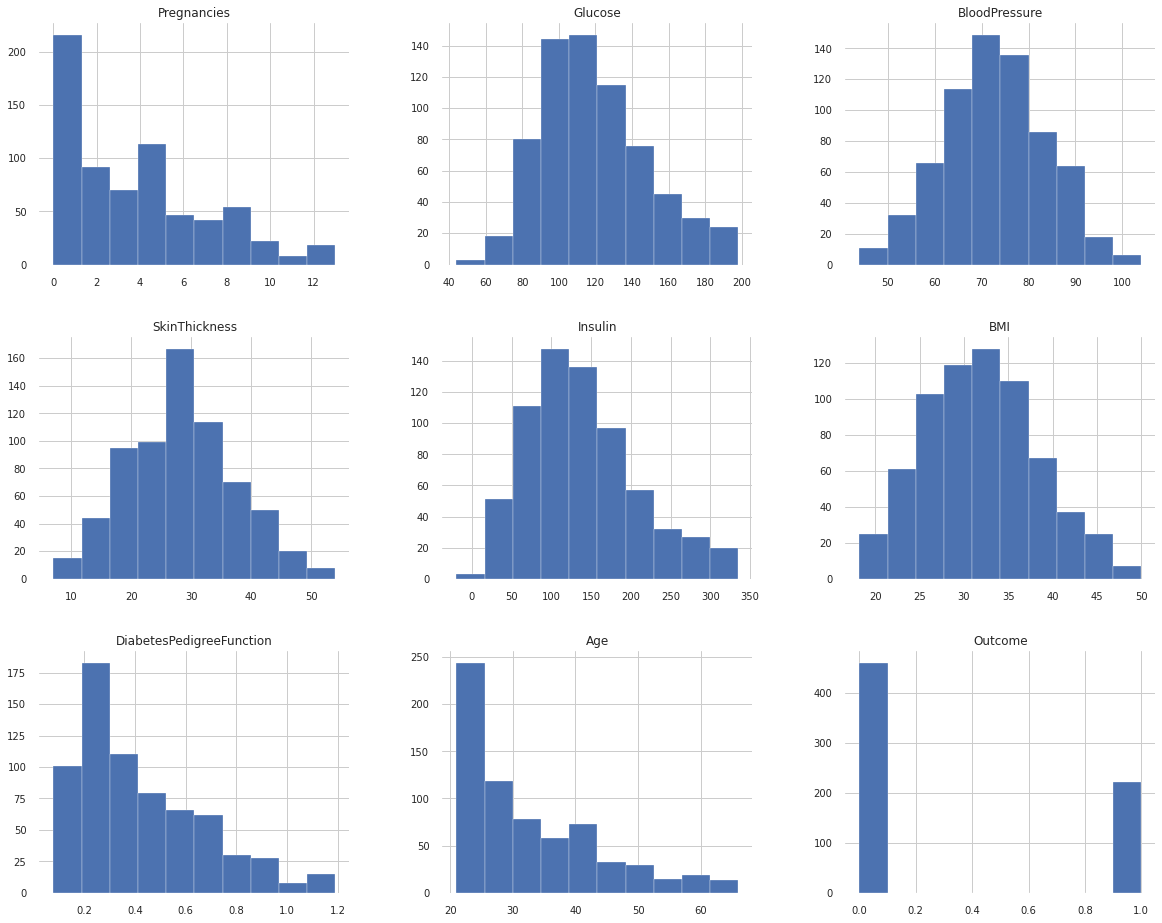

In [ ]:
_ = df_cleaned.hist(figsize=(20, 16))

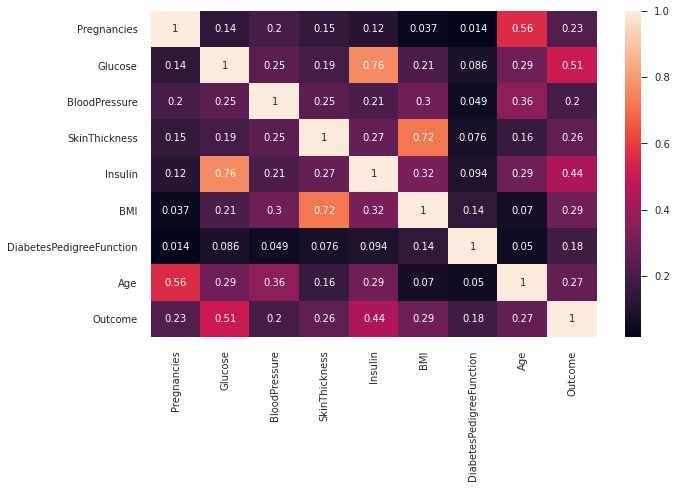

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(), annot=True)
plt.show()

# 3. Modeling

## 3.1 Define Features and Target

In [ ]:
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

In [ ]:
X.shape

(682, 8)

In [ ]:
y.shape

(682,)

## 3.2 Compare Baseline Models

In [ ]:
def model_evaluation(X, y, model, name):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  # Generate classification report
  # print(classification_report(y_test, preds, target_names=['0', '1']))
  print('Average F1 score on training set (5-fold CV):', cv_scores.mean())
  print('F1 score on testing set:', f1_score(y_test, preds))

  # Create dictionaries
  train = {'model': name, 'category': 'training', 'score': cv_scores.mean()}
  test = {'model': name, 'category': 'testing', 'score': f1_score(y_test, preds)}
  result = [train, test]

  return pd.DataFrame.from_records(result)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
evaluation = pd.DataFrame(columns=['model', 'category', 'score'])
evaluation

,model,category,score


### 3.2.1 Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_jobs = -1, max_features='sqrt', random_state=42)
result = model_evaluation(X, y, rf, 'RandomForestClassifier')
evaluation = evaluation.append(result)

Average F1 score on training set (5-fold CV): 0.637809657087826
F1 score on testing set: 0.6428571428571429


### 3.2.2 AdaBoost Classifier

In [ ]:
ada = AdaBoostClassifier(n_estimators = 1000, learning_rate = 0.05, random_state=42)
result = model_evaluation(X, y, ada, 'AdaBoostClassifier')
evaluation = evaluation.append(result)

Average F1 score on training set (5-fold CV): 0.6130844530096178
F1 score on testing set: 0.5679012345679012


### 3.2.3 Gradient Boosting Classifier

In [ ]:
grd = GradientBoostingClassifier(learning_rate = 0.001, subsample = 0.5, n_estimators = 1000, random_state=42)
result = model_evaluation(X, y, grd, 'GradientBoostingClassifier')
evaluation = evaluation.append(result)

Average F1 score on training set (5-fold CV): 0.5295370779890903
F1 score on testing set: 0.6197183098591549


### 3.2.4 XGBoost Classifier

In [ ]:
xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4, n_jobs = -1, random_state=42)
result = model_evaluation(X, y, xgb, 'XGBClassifier')
evaluation = evaluation.append(result)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[04:45:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:45:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:45:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:45:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### 3.2.5 Support Vector Classification with Linear Kernel

In [ ]:
svc = SVC(kernel="linear", C=0.025)
result = model_evaluation(X, y, svc, 'Support Vector Classification')
evaluation = evaluation.append(result)

Average F1 score on training set (5-fold CV): 0.6067761803607332
F1 score on testing set: 0.6419753086419754


### 3.2.6 Multi-layer Perceptron Classifier

In [ ]:
mlp = MLPClassifier(random_state=42, alpha=0.1, max_iter=1000)
result = model_evaluation(X, y, mlp, 'Multi-layer Perceptron')
evaluation = evaluation.append(result)

Average F1 score on training set (5-fold CV): 0.5347649723504964
F1 score on testing set: 0.5609756097560975


## 3.2.7 Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 5, max_depth = 4, random_state=42)
result = model_evaluation(X, y, dt, 'Decision Tree')
evaluation = evaluation.append(result)

Average F1 score on training set (5-fold CV): 0.528860510733469
F1 score on testing set: 0.5974025974025974


### 3.2.8 TPOT Classifier

In [ ]:
# Train and Test model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tpot = TPOTClassifier(generations=25, population_size=50, n_jobs=-1,
                      verbosity=1, scoring="f1")
tpot.fit(X_train, y_train)
preds = tpot.predict(X_test)

# Generate classification report
print(classification_report(y_test, preds, target_names=['0', '1']))

Best pipeline: XGBClassifier(RFE(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.5, min_samples_leaf=2, min_samples_split=16, n_estimators=100), criterion=entropy, max_features=0.6500000000000001, n_estimators=100, step=1.0), learning_rate=0.001, max_depth=3, min_child_weight=18, n_estimators=100, n_jobs=1, subsample=0.35000000000000003, verbosity=0)
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        93
           1       0.59      0.82      0.69        44

    accuracy                           0.76       137
   macro avg       0.74      0.77      0.75       137
weighted avg       0.80      0.76      0.77       137



In [ ]:
# Create dictionaries
train = {'model': 'TPOT Classifier', 'category': 'training', 'score': 0}
test = {'model': 'TPOT Classifier', 'category': 'testing', 'score': f1_score(y_test, preds)}
result = [train, test]

evaluation = evaluation.append(pd.DataFrame.from_records(result))

In [ ]:
tpot.export('tpot_exported_pipeline.py')

## 3.3 Visualize Models Comparison

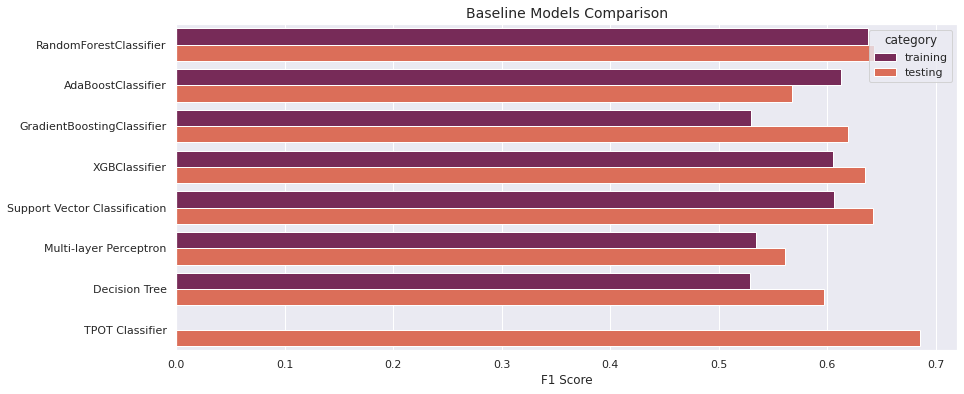

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(y='model', x='score', data=evaluation, hue='category', palette='rocket')
plt.title('Baseline Models Comparison', size=14)
plt.ylabel('')
plt.xlabel('F1 Score')
plt.show()

## 3.4 Hyperparamater Tuning Using Optuna

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('Training Data: ', X_train.shape)
print('Testing Data: ', X_test.shape)
print('Training Target: ', y_train.shape)
print('Testing Target: ', y_test.shape)

Training Data:  (545, 8)
Testing Data:  (137, 8)
Training Target:  (545,)
Testing Target:  (137,)


In [ ]:
def objective(trial, X_train=X_train, y_train=y_train):
  criterions = trial.suggest_categorical('criterion', ['gini', 'entropy'])
  n_estimators = trial.suggest_int('n_estimators', 10, 1000, 10)
  max_depth = trial.suggest_int("max_depth", 2, 32, log=True)

  clf = RandomForestClassifier(n_estimators=n_estimators, 
                               max_depth=max_depth,
                               n_jobs = -1, 
                               max_features='sqrt',
                               criterion=criterions)
  
  return cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=3, scoring='f1').mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

[I 2021-05-29 10:32:28,419] A new study created in memory with name: no-name-e943ded3-d54f-45dd-8f70-dfb272dddb57
[I 2021-05-29 10:32:33,099] Trial 0 finished with value: 0.6304642577912374 and parameters: {'criterion': 'gini', 'n_estimators': 900, 'rf_max_depth': 21}. Best is trial 0 with value: 0.6304642577912374.
[I 2021-05-29 10:32:33,820] Trial 1 finished with value: 0.5952380952380952 and parameters: {'criterion': 'gini', 'n_estimators': 80, 'rf_max_depth': 15}. Best is trial 0 with value: 0.6304642577912374.
[I 2021-05-29 10:32:37,058] Trial 2 finished with value: 0.6162736939435968 and parameters: {'criterion': 'entropy', 'n_estimators': 580, 'rf_max_depth': 26}. Best is trial 0 with value: 0.6304642577912374.
[I 2021-05-29 10:32:37,918] Trial 3 finished with value: 0.5999220272904484 and parameters: {'criterion': 'entropy', 'n_estimators': 110, 'rf_max_depth': 14}. Best is trial 0 with value: 0.6304642577912374.
[I 2021-05-29 10:32:39,597] Trial 4 finished with value: 0.535450

In [ ]:
trial = study.best_trial
print('Best F1 Score: {}'.format(trial.value))

Best F1 Score: 0.6483558640847643


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

# 4. Evaluation

## 4.1 Create Model with Best Parameter

In [ ]:
best_trial = study.best_trial.params
best_trial

{'criterion': 'gini', 'n_estimators': 250, 'rf_max_depth': 8}

In [ ]:
rfc_tuned = RandomForestClassifier(criterion='gini', n_estimators=250, 
                                   max_depth=8, n_jobs = -1, max_features='sqrt',
                                   random_state=42)
rfc_tuned.fit(X_train, y_train)
preds = rfc_tuned.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, preds, target_names=target_names))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        93
           1       0.66      0.61      0.64        44

    accuracy                           0.77       137
   macro avg       0.74      0.73      0.74       137
weighted avg       0.77      0.77      0.77       137



## 4.2 Draw AUC-ROC Curve


- **Sensitivity / True Positive Rate / Recall** tells us what proportion of the positive class got correctly classified.

  Formula: TP/(TP+FN)

  Example: proportion of the actual sick people were correctly detected by the model.

- **False Negative Rate** tells us what proportion of the positive class got incorrectly classified by the classifier. A higher TPR and a lower FNR is desirable if we want to correctly classify the positive class.

  Formula: FN/(TP+FN)

- **Specificity / True Negative Rate** tells us what proportion of the negative class got correctly classified.

  Formula: TN/(TN+FP)

  Example: proportion of healthy people who were correctly identified by the model.

- **False Positive Rate** tells us what proportion of the negative class got incorrectly classified by the classifier. A higher TNR and a lower FPR is desirable if we want to correctly classify the negative class.

  Formula: FP/(TN+FP) = 1 - Specificity

The **Receiver Operator Characteristic **(ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the **TPR** against **FPR** at various threshold values and essentially **separates the ‘signal’ from the ‘noise’**. The **Area Under the Curve ** (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

*The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.*

Source: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/


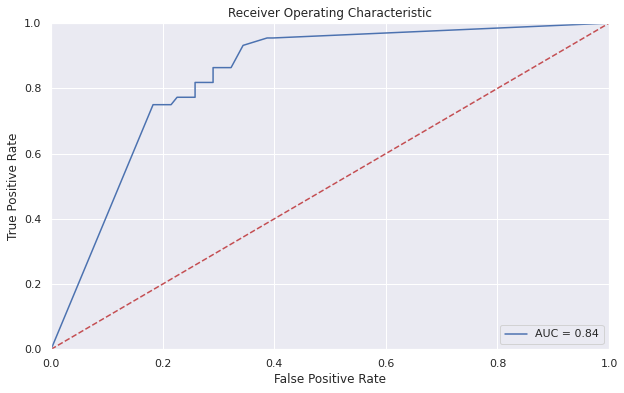

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score

# calculate the fpr and tpr for all thresholds of the classification
probs = tpot.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()